In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import xarray as xr
from skimage import io
import subprocess
from osgeo import gdal, osr

import cartopy.feature as cf
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker
import cartopy.feature as cf
from cartopy.util import add_cyclic_point

import rioxarray as rxr

import georaster
from mpl_toolkits.basemap import Basemap


# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [3]:
def plot_DEM(
    extent,
    sct_pt,
    vmin=0,
    vmax=300,
):
    
    minx, maxx, miny, maxy = extent

    fp =  "/Users/annalea_albright/Dropbox/BPCE/Data/output.tif"
    
    # load the geotiff image, assign it a variable
    image = georaster.SingleBandRaster( fp, \
                            load_data=(minx, maxx, miny, maxy), \
                            latlon=True)

    im_array = image.r

    # value of 1 for oceans, lakes, reservoirs, etc
    im_array[im_array == 1.000] = np.nan
    
    # plot

    fig, ax = plt.subplots(figsize=(12,20))

    offset = 0
    # set Basemap with slightly larger extents
    # set resolution at intermediate level "i"
    m = Basemap( projection='cyl', \
                llcrnrlon=minx-offset, \
                llcrnrlat=miny-offset, \
                urcrnrlon=maxx+offset, \
                urcrnrlat=maxy+offset, \
                resolution='h')

    m.drawcoastlines(color="black")
    m.drawcountries(color="black")
    #m.fillcontinents(color='white')

    m.drawmeridians(range(-10, 10, 1), labels=[False, False, False, True])
    m.drawparallels(range(40, 53, 1), labels=[True, False, False, False])

    im = plt.imshow(
                    im_array,  # array values 
                    extent=(minx, maxx, miny, maxy), 
                    vmin=vmin,
                    vmax=vmax,
                    zorder=10, 
                    alpha=0.65,
                   cmap="terrain", # terrain, plasma
              )

    if 0:
        plt.scatter(
            location_data.lon.values,
            location_data.lat.values,
            color="black",
            s=200,
            zorder=11,
        )
    if sct_pt!=0:
        plt.scatter(
            sct_pt[0],
            sct_pt[1],
            color="black",
            s=200,
            zorder=11,
        )
        

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb = plt.colorbar(im, cax=cax, )
    cb.set_label(label="élévation de terrain (m)", size='large', 
                 #weight='bold'
                )



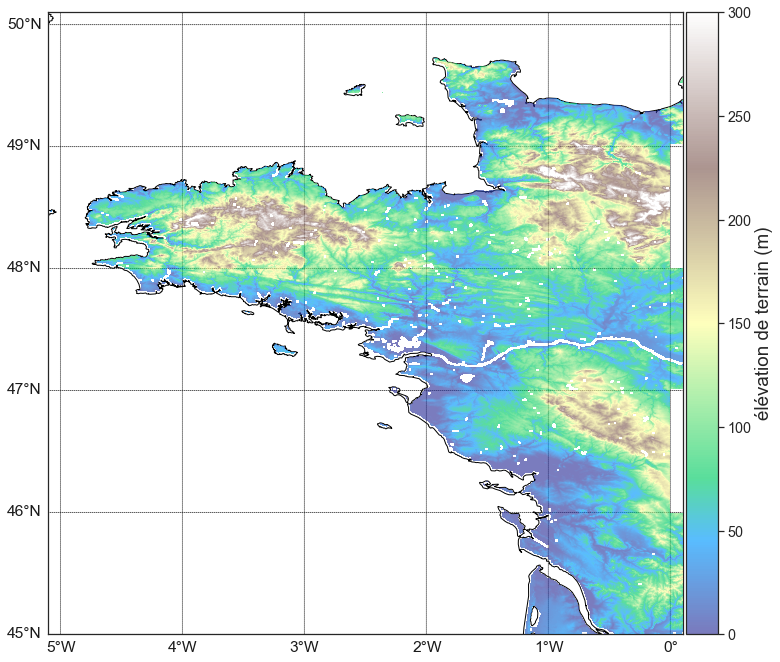

In [354]:
extent = -5.1, 0.1, 45, 50.1
plot_DEM(
    im_array,
    extent,
    sct_pt=0
)

## Saint Malo

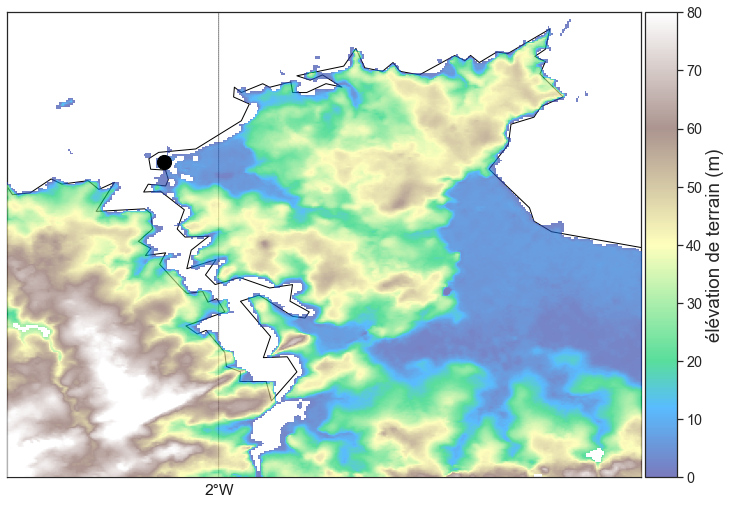

In [355]:
extent = -2.1, -1.8, 48.5, 48.72
plot_DEM(
    extent,
    sct_pt=[-2.0257, 48.6493],
    vmin=0,
    vmax=80,  # 80
)

## Dunkerque

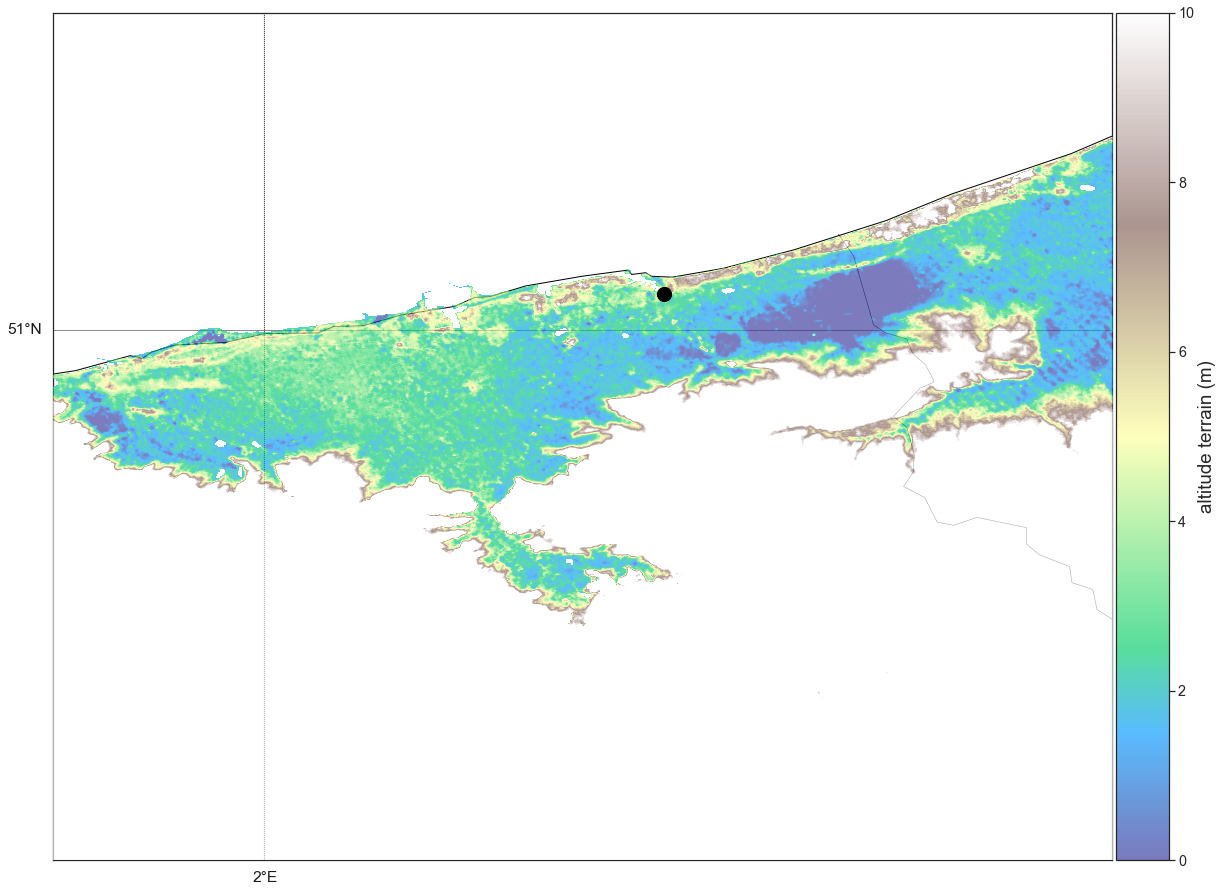

In [244]:
extent = 1.8, 2.8, 50.5, 51.3
plot_DEM(
    extent,
    sct_pt=[2.3768, 51.0344],
    vmin=0,
    vmax=10,  # 80
)

## Goal:

Take example like Dunkerque, add X for highest astronomical tide, storm surge, sea level rise, where is it < 0

## Dunkerque

In [4]:
minx, maxx, miny, maxy = 1.8, 2.7, 50.7, 51.3

fp =  "/Users/annalea_albright/Dropbox/BPCE/Data/output.tif"

# load the geotiff image's geographic subset, assign it a variable
image = georaster.SingleBandRaster( fp, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

im_array = image.r

# value of 1 for oceans, lakes, reservoirs, etc
im_array[im_array == 1.000] = np.nan

im_array_with_tide = im_array - 4.376885 - 3.5 
# 2,9 m 100 year return period surge and 0,6 m sea level rise

arr_sel = im_array_with_tide<=0

im_array_with_tide[~arr_sel] = np.nan
print(im_array_with_tide)

#print(np.sum(np.isnan(im_array_with_tide)))

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


## Dunkerque

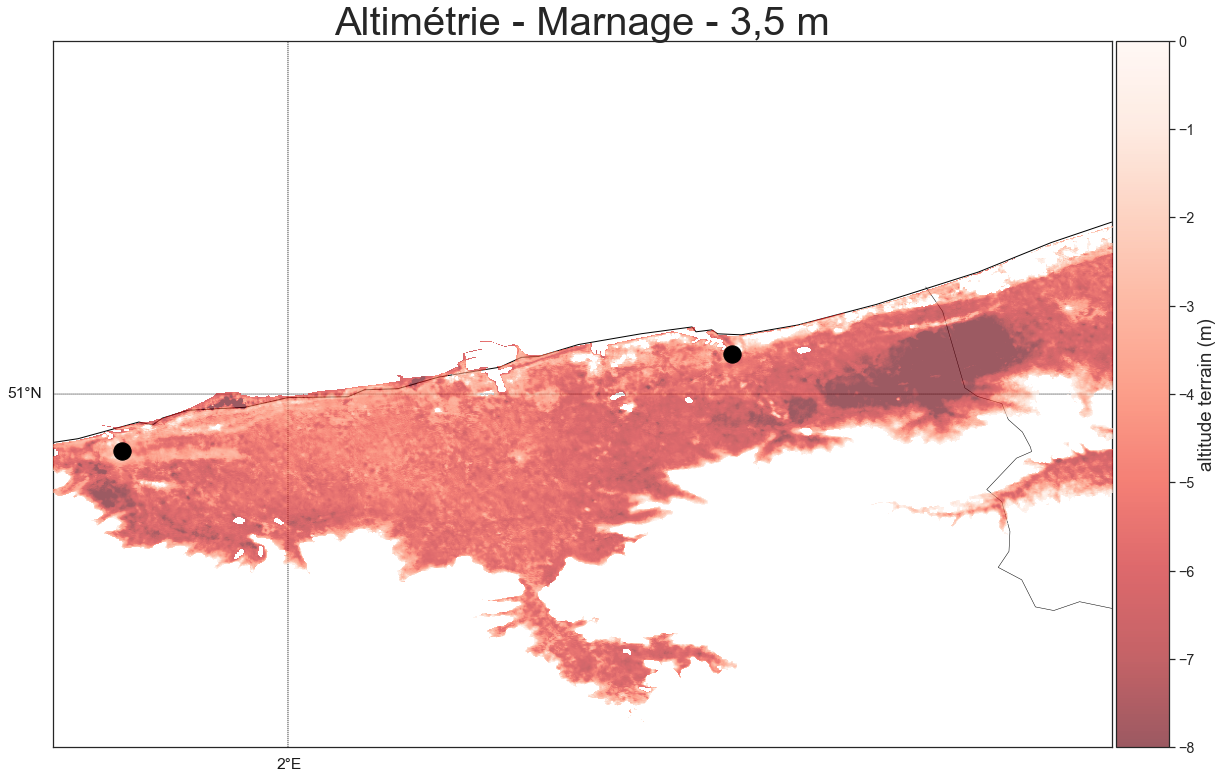

In [7]:
# plot

fig, ax = plt.subplots(figsize=(20,20))

offset = 0
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap( projection='cyl', \
            llcrnrlon=minx-offset, \
            llcrnrlat=miny-offset, \
            urcrnrlon=maxx+offset, \
            urcrnrlat=maxy+offset, \
            resolution='h')




m.drawcoastlines(color="black")
m.drawcountries(color="black")
#m.fillcontinents(color='white')

m.drawmeridians(range(-10, 10, 1), labels=[False, False, False, True])
m.drawparallels(range(40, 53, 1), labels=[True, False, False, False])

im = plt.imshow(
                im_array_with_tide,  # array values 
                extent=(minx, maxx, miny, maxy), 
                vmin=-8,
                vmax=0,
                zorder=10, 
                alpha=0.65,
               cmap="Reds_r", # terrain, plasma
          )

plt.title('Altimétrie - Marnage - 3,5 m', fontsize=40)
plt.scatter(1.8587, 50.9513, color="black", s=300,zorder=11,
           )

plt.scatter(2.3768, 51.0344, color="black", s=300,zorder=11,
           )

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax, )
cb.set_label(label="altitude terrain (m)", size='large', 
             #weight='bold'
            )



## Saint Malo

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


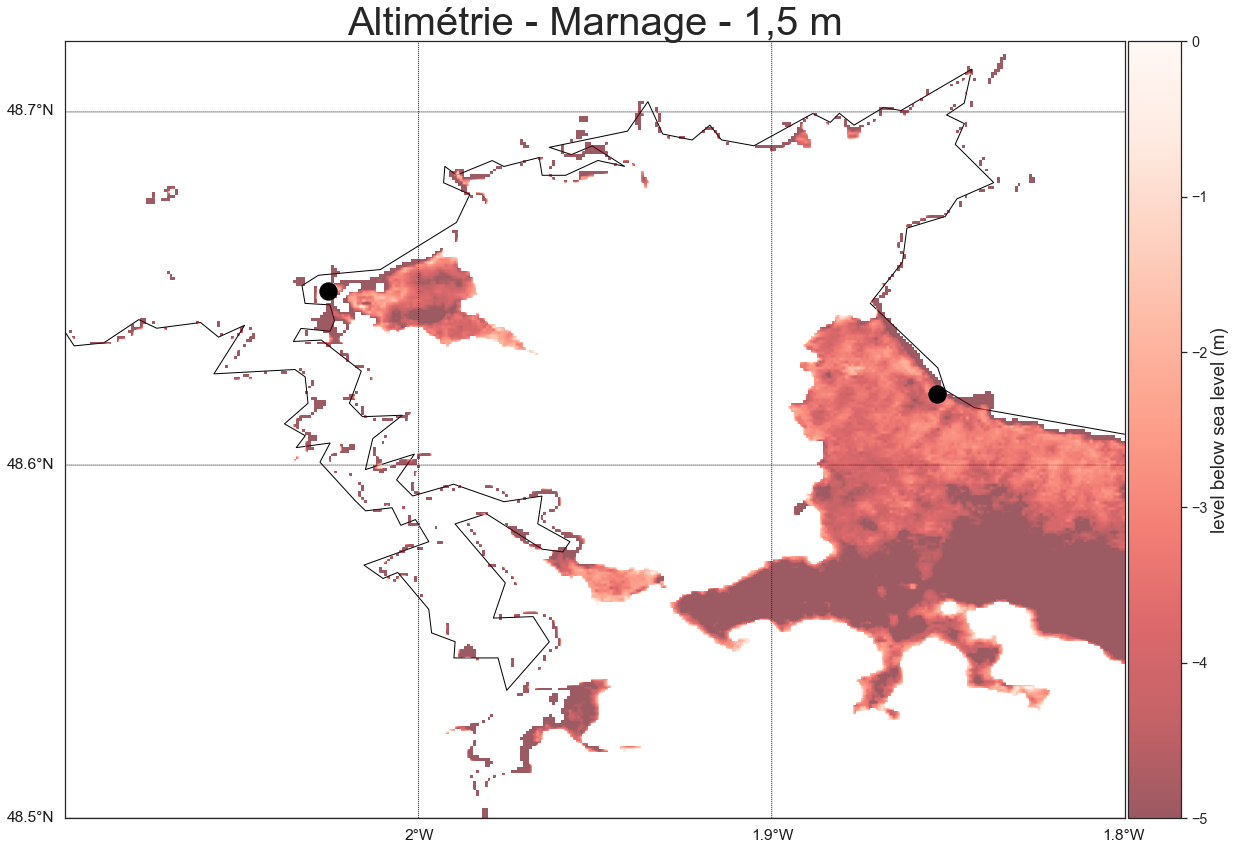

In [379]:
minx, maxx, miny, maxy =  -2.1, -1.8, 48.5, 48.72

fp =  "/Users/annalea_albright/Dropbox/BPCE/Data/output.tif"

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fp, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

im_array = image.r

# value of 1 for oceans, lakes, reservoirs, etc
im_array[im_array == 1.000] = np.nan

im_array_with_tide = im_array - 8 - 1.5

arr_sel = im_array_with_tide<=0

im_array_with_tide[~arr_sel] = np.nan
print(im_array_with_tide)

#print(np.sum(np.isnan(im_array_with_tide)))

# plot

fig, ax = plt.subplots(figsize=(20,20))

offset = 0
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap( projection='cyl', \
            llcrnrlon=minx-offset, \
            llcrnrlat=miny-offset, \
            urcrnrlon=maxx+offset, \
            urcrnrlat=maxy+offset, \
            resolution='h')


m.drawcoastlines(color="black")
m.drawcountries(color="black")
#m.fillcontinents(color='white')

m.drawmeridians(np.arange(-10, 10, 0.1), labels=[False, False, False, True])
m.drawparallels(np.arange(40, 53, 0.1), labels=[True, False, False, False])

im = plt.imshow(
                im_array_with_tide,  # array values 
                extent=(minx, maxx, miny, maxy), 
                vmin=-5,
                vmax=0,
                zorder=10, 
                alpha=0.65,
               cmap="Reds_r", # terrain, plasma, Blues_r
          )

plt.title('Altimétrie - Marnage - 1,5 m', fontsize=40)

plt.scatter(-2.0257, 48.6493,
 color="black", s=300,zorder=11,
            #label="Saint Malo"
           )

plt.scatter(-1.8532, 48.6200,
 color="black", s=300,zorder=11,
            #label="Saint-Benoît-des-Ondes"
           )

#Saint-Benoît-des-Ondes

#plt.text(-2, 20, s="Saint Malo")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax, )
cb.set_label(label="level below sea level (m)", size='large', 
             #weight='bold'
            )



## Saint Jean de Luz

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


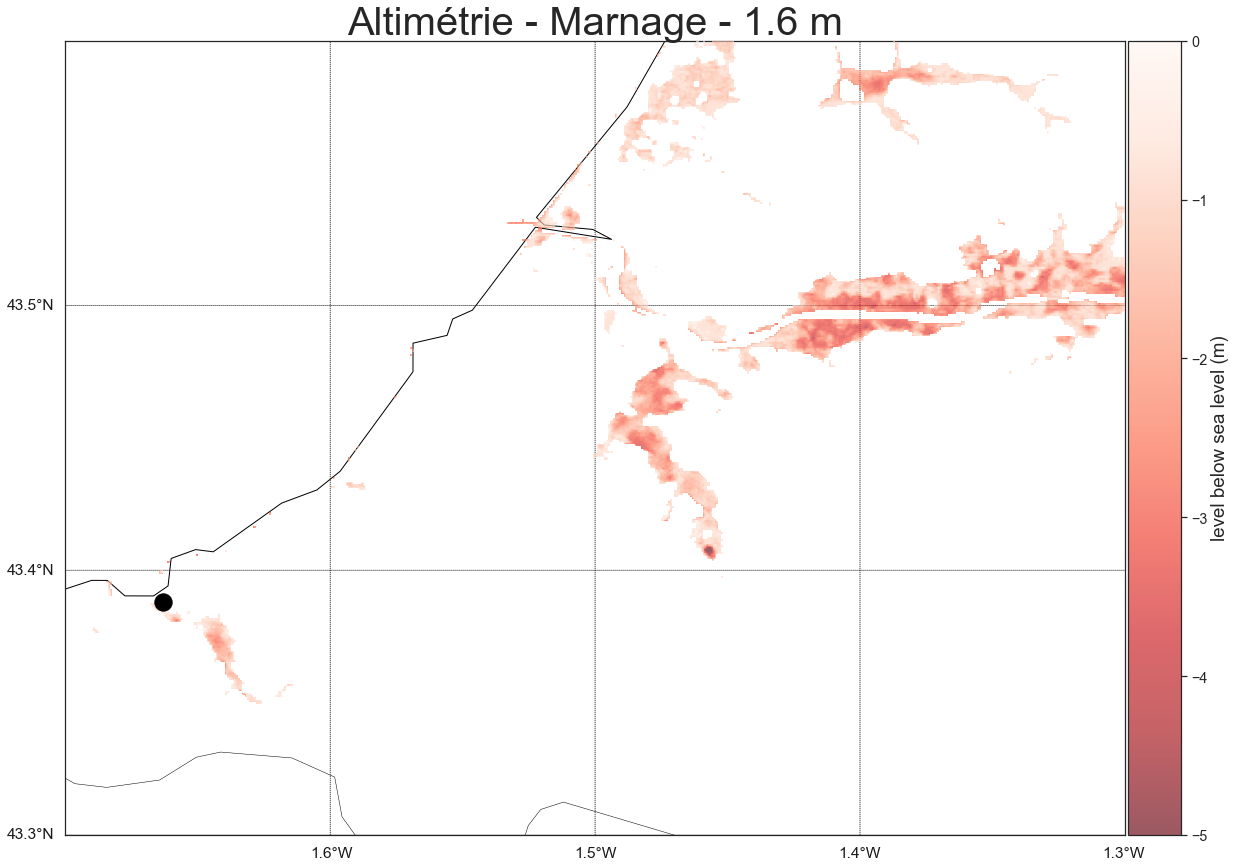

In [8]:
minx, maxx, miny, maxy =  -1.7, -1.3, 43.3, 43.6

fp =  "/Users/annalea_albright/Dropbox/BPCE/Data/output.tif"

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fp, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

im_array = image.r

# value of 1 for oceans, lakes, reservoirs, etc
im_array[im_array == 1.000] = np.nan

marnage = 2.539386  
sea_level_rise = 0.6
surge = 1 # 0,6 for 2 years, or 1 for 100 years

im_array_with_tide = im_array - marnage - sea_level_rise - surge

arr_sel = im_array_with_tide<=0

im_array_with_tide[~arr_sel] = np.nan
print(im_array_with_tide)

#print(np.sum(np.isnan(im_array_with_tide)))

# plot

fig, ax = plt.subplots(figsize=(20,20))

offset = 0
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap( projection='cyl', \
            llcrnrlon=minx-offset, \
            llcrnrlat=miny-offset, \
            urcrnrlon=maxx+offset, \
            urcrnrlat=maxy+offset, \
            resolution='h')


m.drawcoastlines(color="black")
m.drawcountries(color="black")
#m.fillcontinents(color='white')

m.drawmeridians(np.arange(-10, 10, 0.1), labels=[False, False, False, True])
m.drawparallels(np.arange(40, 53, 0.1), labels=[True, False, False, False])

im = plt.imshow(
                im_array_with_tide,  # array values 
                extent=(minx, maxx, miny, maxy), 
                vmin=-5,
                vmax=0,
                zorder=10, 
                alpha=0.65,
               cmap="Reds_r", # terrain, plasma, Blues_r
          )

plt.title(f'Altimétrie - Marnage - {sea_level_rise+ surge} m', fontsize=40)

plt.scatter(-1.6631, 43.3881,
 color="black", s=300,zorder=11,
            #label="Saint Malo"
           )

#plt.scatter(-1.8532, 48.6200,
# color="black", s=300,zorder=11,
            #label="Saint-Benoît-des-Ondes"
#           )

#Saint-Benoît-des-Ondes

#plt.text(-2, 20, s="Saint Malo")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax, )
cb.set_label(label="level below sea level (m)", size='large', 
             #weight='bold'
            )




## Saint Jean de Lux et Guéthary

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


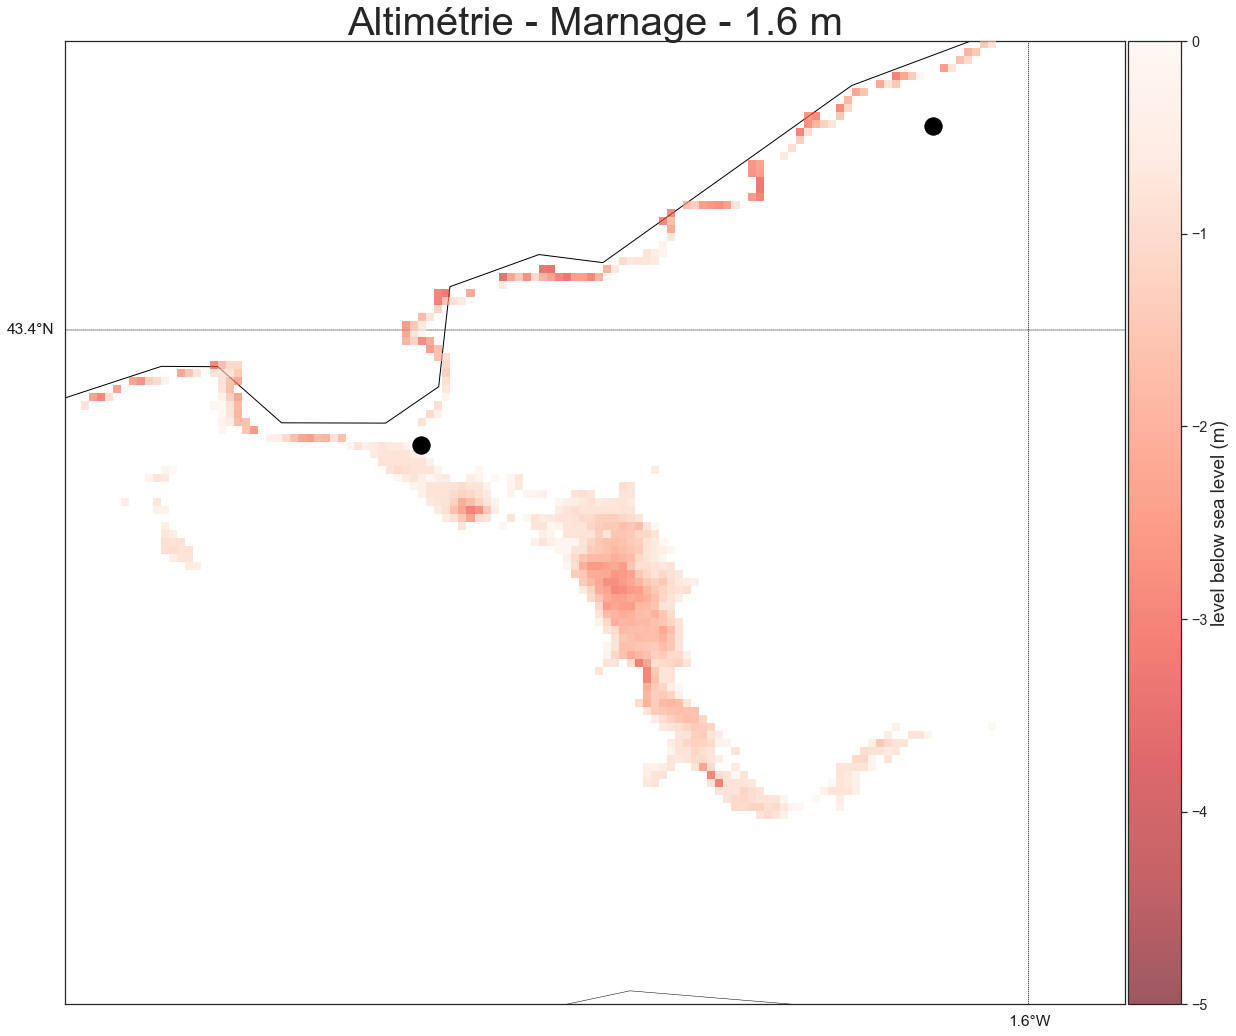

In [9]:
minx, maxx, miny, maxy =  -1.7, -1.59, 43.33, 43.43

fp =  "/Users/annalea_albright/Dropbox/BPCE/Data/output.tif"

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fp, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

im_array = image.r

# value of 1 for oceans, lakes, reservoirs, etc
im_array[im_array == 1.000] = np.nan

marnage = 2.539386  
sea_level_rise = 0.6
surge = 1 # 0,6 for 2 years, or 1 for 100 years

im_array_with_tide = im_array - marnage - sea_level_rise - surge

arr_sel = im_array_with_tide<=0

im_array_with_tide[~arr_sel] = np.nan
print(im_array_with_tide)

#print(np.sum(np.isnan(im_array_with_tide)))

# plot

fig, ax = plt.subplots(figsize=(20,20))

offset = 0
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap( projection='cyl', \
            llcrnrlon=minx-offset, \
            llcrnrlat=miny-offset, \
            urcrnrlon=maxx+offset, \
            urcrnrlat=maxy+offset, \
            resolution='h')


m.drawcoastlines(color="black")
m.drawcountries(color="black")
#m.fillcontinents(color='white')

m.drawmeridians(np.arange(-10, 10, 0.1), labels=[False, False, False, True])
m.drawparallels(np.arange(40, 53, 0.1), labels=[True, False, False, False])

im = plt.imshow(
                im_array_with_tide,  # array values 
                extent=(minx, maxx, miny, maxy), 
                vmin=-5,
                vmax=0,
                zorder=10, 
                alpha=0.65,
               cmap="Reds_r", # terrain, plasma, Blues_r
          )

plt.title(f'Altimétrie - Marnage - {sea_level_rise+ surge} m', fontsize=40)

plt.scatter(-1.6631, 43.3881,
 color="black", s=300,zorder=11,
           )

plt.scatter(-1.6099, 43.4212,
 color="black", s=300,zorder=11,
           )


#plt.text(-2, 20, s="Saint Malo")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax, )
cb.set_label(label="level below sea level (m)", size='large', 
             #weight='bold'
            )





## Marseille 

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


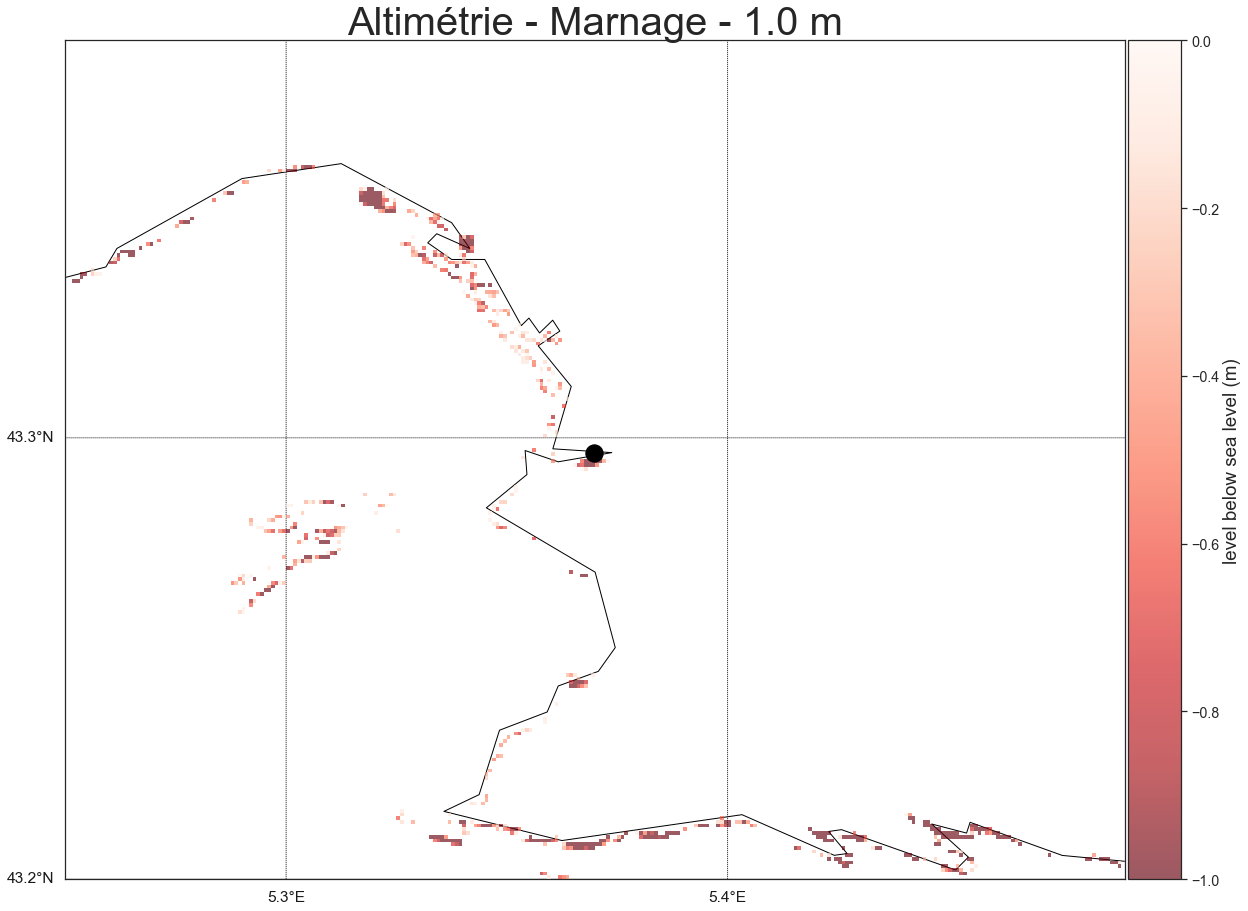

In [10]:
#Marseille/Coordinates
#43.2965° N, 5.3698° E

minx, maxx, miny, maxy =  5.25, 5.49, 43.2, 43.39

fp =  "/Users/annalea_albright/Dropbox/BPCE/Data/output.tif"

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fp, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

im_array = image.r

# value of 1 for oceans, lakes, reservoirs, etc
im_array[im_array == 1.000] = np.nan

marnage = 0.163846
sea_level_rise = 0.6
surge = 0.4 # 0,6 for 2 years, or 1 for 100 years

im_array_with_tide = im_array - marnage - sea_level_rise - surge

arr_sel = im_array_with_tide<=0

im_array_with_tide[~arr_sel] = np.nan
print(im_array_with_tide)

#print(np.sum(np.isnan(im_array_with_tide)))

# plot

fig, ax = plt.subplots(figsize=(20,20))

offset = 0
# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap( projection='cyl', \
            llcrnrlon=minx-offset, \
            llcrnrlat=miny-offset, \
            urcrnrlon=maxx+offset, \
            urcrnrlat=maxy+offset, \
            resolution='h')


m.drawcoastlines(color="black")
m.drawcountries(color="black")
#m.fillcontinents(color='white')

m.drawmeridians(np.arange(-10, 10, 0.1), labels=[False, False, False, True])
m.drawparallels(np.arange(40, 53, 0.1), labels=[True, False, False, False])

im = plt.imshow(
                im_array_with_tide,  # array values 
                extent=(minx, maxx, miny, maxy), 
                vmin=-1,
                vmax=0,
                zorder=10, 
                alpha=0.65,
               cmap="Reds_r", # terrain, plasma, Blues_r
          )

plt.title(f'Altimétrie - Marnage - {sea_level_rise+ surge} m', fontsize=40)

plt.scatter(5.3698, 43.2965,
 color="black", s=300,zorder=11,
            #label="Saint Malo"
           )


#plt.scatter(-1.8532, 48.6200,
# color="black", s=300,zorder=11,
            #label="Saint-Benoît-des-Ondes"
#           )

#Saint-Benoît-des-Ondes

#plt.text(-2, 20, s="Saint Malo")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(im, cax=cax, )
cb.set_label(label="level below sea level (m)", size='large', 
             #weight='bold'
            )




